In [ ]:
#Pyber has the greatest presence in urban areas and lowest presence in rural areas
#there is a strong correlation between number of rides and total fares. For example, Urban areas have the greatest number of riders and therefore seem to provide the largest proportion of total fares for Pyber
#rural areas have fewer drivers available and the highest fares on average

In [8]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data_combined = pd.merge(ride_data,city_data,on='city',how='left')

# Display the data table for preview
pyber_data_combined.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

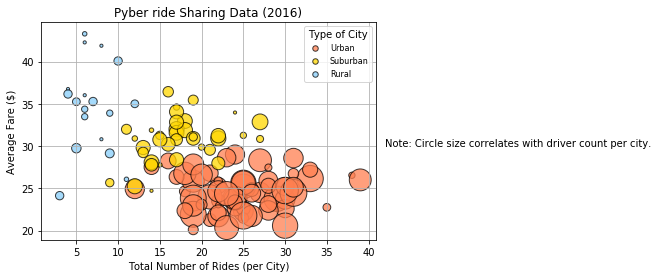

In [73]:
# Obtain the x and y coordinates for each of the three city types
urban_city_data = pyber_data_combined[pyber_data_combined["type"]== "Urban"].groupby([pyber_data_combined["city"]])
suburban_city_data = pyber_data_combined[pyber_data_combined["type"]== "Suburban"].groupby([pyber_data_combined["city"]])
rural_city_data = pyber_data_combined[pyber_data_combined["type"]== "Rural"].groupby([pyber_data_combined["city"]])

# Build the scatter plots for each city types
urban_x = urban_city_data["ride_id"].count()
urban_y = urban_city_data["fare"].mean()
urban_s = urban_city_data["driver_count"].mean()

suburban_x = suburban_city_data["ride_id"].count()
suburban_y = suburban_city_data["fare"].mean()
suburban_s = suburban_city_data["driver_count"].mean()

rural_x = rural_city_data["ride_id"].count()
rural_y = rural_city_data["fare"].mean()
rural_s = rural_city_data["driver_count"].mean()

plt.scatter(urban_x, urban_y, label = "Urban", s=urban_s*10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(suburban_x, suburban_y, label = "Suburban", s=suburban_s * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(rural_x, rural_y, label = "Rural", s=rural_s * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (per City)")

plt.ylabel("Average Fare ($)")

plt.title("Pyber ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize=8, title = "Type of City", loc="best")

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,30,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("PyberRideSharingData2016.png", bbox_inches='tight')
plt.show()

## Total Fares by City Type

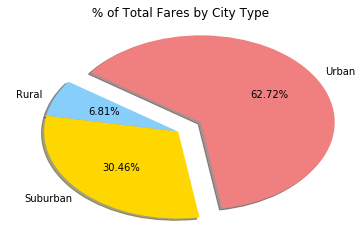

In [83]:
type_grouped = pyber_data_combined.groupby(['type'])
fare_sum = type_grouped['fare'].sum()

labels1 = ["Rural","Suburban","Urban"]
explode = (0,0,0.2)
colors = ["lightskyblue", "gold", "lightcoral"]
plt.pie(fare_sum, explode=explode,labels=labels1, colors=colors, autopct ="%2.2f%%", shadow=True,startangle=145)

plt.title(" % of Total Fares by City Type")

plt.savefig("TotalFaresbyCityType.png")

plt.show()

## Total Rides by City Type

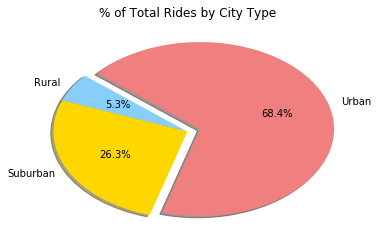

In [84]:
rides_city_count = type_grouped['ride_id'].count()

labels2 = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["lightskyblue", "gold", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels2, colors=colors, autopct="%2.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

plt.savefig ("%ofTotalRidesbyCityType.png")

plt.show()

## Total Drivers by City Type

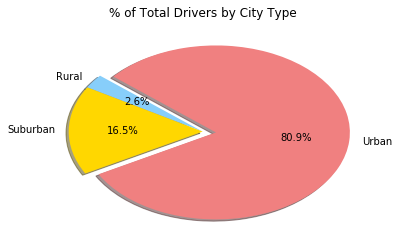

In [85]:
type_grouped_drivers = city_data.groupby(['type'])
drivers_sum = type_grouped_drivers['driver_count'].sum()

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["lightskyblue", "gold", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%2.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("%ofTotalDriversbyCityType.png")

# Show Figure
plt.show()